## GReaT Example with Iris Dataset

In [2]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import numpy as np
import pandas as pd
import logging

In [4]:
from examples.utils import set_logging_level
from be_great import GReaT

/data/guoquanjiang/envs/begreat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import matplotlib.pyplot as plt

In [6]:
logger = set_logging_level(logging.INFO)
data = pd.read_csv('C:/Users/Windows 11/Desktop/Dissertation/Codes/Data/Biology/Dry_Bean_Dataset.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### Create GReaT Model

In [7]:
# great = GReaT("/data/guoquanjiang/llm_ner/llama3-8b/LLM-Research/Meta-Llama-3-8B",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=10,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=500,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_travel", # Name of the directory where all intermediate steps are saved
#               batch_size=16,                 # Batch Size
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=5e-5            # Set the inital learning rate
#               efficient_finetuning="lora"
#              )
great = GReaT("/data/guoquanjiang/be_great/models/iiBcai/gpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=10,                   # Number of epochs to train
              save_steps=2000,               # Save model weights every x steps
              logging_steps=100,             # Log the loss and learning rate every x steps
              experiment_dir="trainer_dry_bean", # Name of the directory where all intermediate steps are saved
              batch_size=16                # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
            #   efficient_finetuning="lora"
             )

### Start Training

In [10]:
trainer = great.fit(data)

2024-06-28 22:07:44,728 - INFO - Convert data into HuggingFace dataset object... (great.py:172)
2024-06-28 22:07:44,749 - INFO - Create GReaT Trainer... (great.py:177)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
2024-06-28 22:07:44,890 - INFO - Start training... (great.py:193)


Step,Training Loss
100,2.739400
200,2.641800
300,2.607200
400,2.593900
500,2.576300
600,2.566900
700,2.554700
800,2.545400
900,2.543200
1000,2.532200


In [11]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 7023.2291,
 'train_samples_per_second': 19.38,
 'train_steps_per_second': 1.212,
 'total_flos': 1.4624195560704e+16,
 'train_loss': 2.446263681091237,
 'epoch': 10.0,
 'step': 8510}

In [12]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

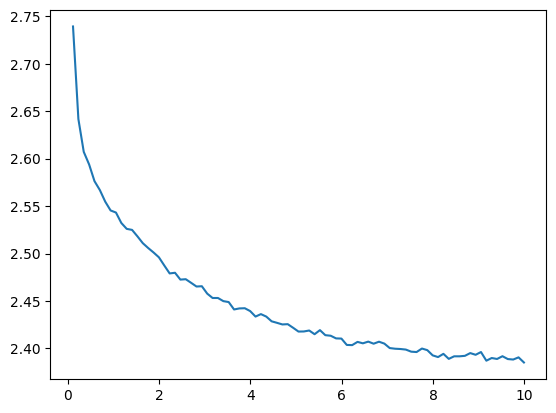

In [13]:
plt.plot(epochs, loss)

### Generate Samples

In [14]:
n_samples = 1000

In [15]:
samples = great.sample(n_samples, k=50, max_length=500)

  0%|          | 0/1000 [00:00<?, ?it/s]

['Class is SIRA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is CALI,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is HOROZ,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is BOMBAY,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is SEKER,', 'Class is CALI,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is SIRA,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SIRA,']


  4%|▍         | 44/1000 [00:07<02:40,  5.97it/s]

['Class is SEKER,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is SIRA,', 'Class is BOMBAY,', 'Class is SIRA,', 'Class is SEKER,', 'Class is BOMBAY,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is CALI,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is CALI,', 'Class is CALI,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is CALI,', 'Class is BOMBAY,']


  9%|▉         | 93/1000 [00:15<02:28,  6.11it/s]

['Class is BARBUNYA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SEKER,', 'Class is BOMBAY,', 'Class is BARBUNYA,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is CALI,', 'Class is BOMBAY,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SIRA,']


 14%|█▍        | 141/1000 [00:22<02:16,  6.29it/s]

['Class is DERMASON,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SEKER,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is CALI,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is CALI,', 'Class is HOROZ,', 'Class is BOMBAY,', 'Class is DERMASON,', 'Class is CALI,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,']


 19%|█▉        | 189/1000 [00:29<02:05,  6.47it/s]

['Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is CALI,', 'Class is SIRA,', 'Class is CALI,', 'Class is BOMBAY,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is BOMBAY,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SEKER,', 'Class is DERMASON,']


 24%|██▍       | 238/1000 [00:37<01:58,  6.46it/s]

['Class is DERMASON,', 'Class is SIRA,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is SIRA,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is BOMBAY,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is DERMASON,']


 28%|██▊       | 284/1000 [00:44<01:52,  6.35it/s]

['Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is BARBUNYA,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is CALI,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is BOMBAY,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is CALI,', 'Class is DERMASON,', 'Cla

 33%|███▎      | 330/1000 [00:52<01:45,  6.33it/s]

['Class is DERMASON,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is CALI,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is CALI,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is BOMBAY,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is SEKER,', 'Class is SEKER,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is CALI,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is SEKER,', 'Class is CALI,', 'Class is CALI,']


 38%|███▊      | 378/1000 [00:59<01:37,  6.41it/s]

['Class is DERMASON,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is CALI,', 'Class is BOMBAY,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is CALI,', 'Class is SIRA,', 'Class is SIRA,', 'Class is BOMBAY,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is BARBUNYA,']


 42%|████▏     | 424/1000 [01:07<01:32,  6.24it/s]

['Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is SEKER,', 'Class is CALI,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SEKER,', 'Class is CALI,', 'Class is SEKER,', 'Class is BOMBAY,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is CALI,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is SIRA,'

 47%|████▋     | 472/1000 [01:14<01:24,  6.28it/s]

['Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is SIRA,', 'Class is CALI,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is CALI,', 'Class is SEKER,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is CALI,', 'Class is SEKER,', 'Class is SIRA,', 'Class is CALI,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is CALI,']


 52%|█████▏    | 517/1000 [01:22<01:17,  6.25it/s]

['Class is SIRA,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is CALI,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is BOMBAY,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is CALI,', 'Class is HOROZ,', 'Class is BOMBAY,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is CALI,', 'Class is SIRA,']


 56%|█████▋    | 565/1000 [01:29<01:08,  6.38it/s]

['Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is BOMBAY,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is CALI,', 'Class is CALI,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is BOMBAY,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SEKER,'

 61%|██████    | 611/1000 [01:36<01:01,  6.37it/s]

['Class is DERMASON,', 'Class is SIRA,', 'Class is CALI,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SIRA,', 'Class is BOMBAY,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is CALI,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is CALI,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SIRA,']


 66%|██████▌   | 660/1000 [01:43<00:52,  6.50it/s]

['Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is CALI,', 'Class is HOROZ,', 'Class is BOMBAY,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is CALI,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SEKER,']


 71%|███████   | 709/1000 [01:51<00:44,  6.54it/s]

['Class is DERMASON,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is CALI,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SEKER,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SEKER,']


 76%|███████▌  | 756/1000 [01:58<00:37,  6.55it/s]

['Class is SEKER,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SEKER,', 'Class is CALI,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is CALI,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is CALI,', 'Class is CALI,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is BOMBAY,']


 80%|████████  | 803/1000 [02:05<00:30,  6.44it/s]

['Class is SEKER,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is CALI,', 'Class is HOROZ,', 'Class is BARBUNYA,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is CALI,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is CALI,', 'Class is CALI,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SEKER,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is BARBUNYA,', 'Class is BOMBAY,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SIRA,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is SEKER,', 'Class is CALI,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is CALI,']


 85%|████████▌ | 851/1000 [02:13<00:23,  6.34it/s]

['Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SIRA,', 'Class is CALI,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is CALI,', 'Class is SEKER,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is CALI,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SEKER,', 'Class is SEKER,', 'Class is CALI,', 'Class is BARBUNYA,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is SIRA,', 'Class is SIRA,', 'Class is BOMBAY,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is DERMASON,']


 90%|████████▉ | 897/1000 [02:20<00:16,  6.37it/s]

['Class is DERMASON,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is CALI,', 'Class is CALI,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is BOMBAY,', 'Class is SIRA,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SIRA,', 'Class is SEKER,', 'Class is SEKER,', 'Class is BOMBAY,', 'Class is BOMBAY,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is SEKER,', 'Class is SIRA,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SEKER,']


 94%|█████████▍| 945/1000 [02:28<00:08,  6.45it/s]

['Class is CALI,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is SEKER,', 'Class is CALI,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is CALI,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is BOMBAY,', 'Class is HOROZ,', 'Class is BARBUNYA,', 'Class is CALI,', 'Class is CALI,', 'Class is SIRA,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is BARBUNYA,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is CALI,', 'Class is HOROZ,', 'Class is BARBUNYA,']


 99%|█████████▉| 988/1000 [02:35<00:01,  6.22it/s]

['Class is HOROZ,', 'Class is DERMASON,', 'Class is CALI,', 'Class is SIRA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is CALI,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is SEKER,', 'Class is SEKER,', 'Class is SEKER,', 'Class is HOROZ,', 'Class is CALI,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is CALI,', 'Class is DERMASON,', 'Class is BOMBAY,', 'Class is DERMASON,', 'Class is SIRA,', 'Class is SIRA,', 'Class is HOROZ,', 'Class is HOROZ,', 'Class is SIRA,', 'Class is SIRA,', 'Class is CALI,', 'Class is DERMASON,', 'Class is CALI,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is SIRA,', 'Class is BARBUNYA,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is SEKER,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is CALI,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,', 'Class is DERMASON,']


1034it [02:43,  6.33it/s]                         


In [16]:
samples.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,49866.0,827.088,300.948372,202.144088,1.521540,0.763870,49425.0,249.890764,0.703829,0.988984,0.901460,0.803531,0.006209,0.001628,0.646609,0.995450,SIRA
1,40908.0,753.904,273.543293,182.642741,1.435745,0.735140,41139.0,224.498847,0.777536,0.988041,0.912155,0.838686,0.007064,0.001757,0.673764,0.996320,SIRA
2,34295.0,765.634,259.957347,174.277769,1.251408,0.606524,34403.0,207.353023,0.772918,0.989139,0.935882,0.881099,0.007499,0.001714,0.793300,0.998323,DERMASON
3,71740.0,1088.711,393.922168,239.414876,1.633203,0.781317,72425.0,302.487565,0.795669,0.983813,0.851718,0.781611,0.005536,0.001160,0.578583,0.994575,CALI
4,29842.0,646.906,248.928895,165.041005,1.687737,0.802223,30450.0,200.638134,0.761107,0.986723,0.888971,0.768735,0.008592,0.001213,0.582386,0.995834,DERMASON


In [17]:
samples.to_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/Biology/Dry_Bean_samples.csv",index=False)

## Plot Data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
670,30,No,Low Income,1,No,Yes,0
211,29,No,Low Income,2,No,No,0
821,37,Yes,High Income,1,No,No,0
410,30,No,Middle Income,3,No,Yes,0
255,37,No,Middle Income,6,No,Yes,0


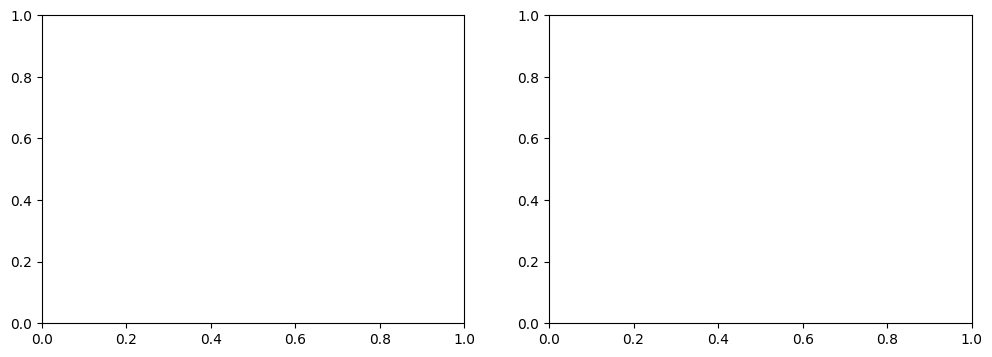

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 100)
true_samples.head()

Original Data

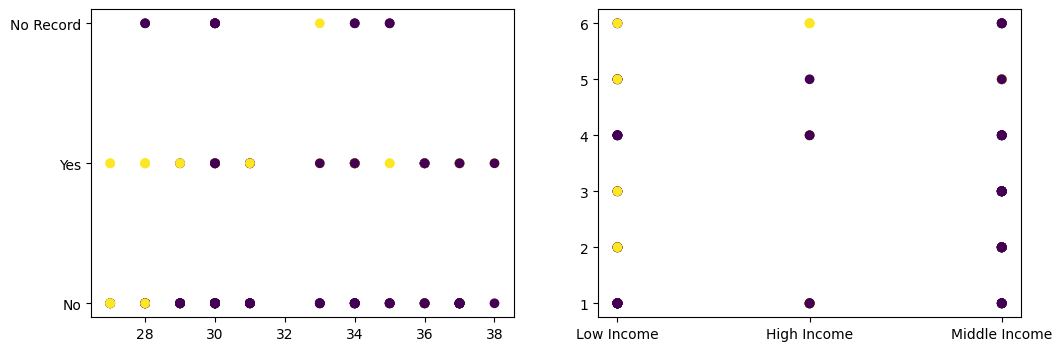

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 200)
ax[0].scatter(true_samples["Age"], true_samples["FrequentFlyer"], c=true_samples["Target"])
ax[1].scatter(true_samples["AnnualIncomeClass"], true_samples["ServicesOpted"], c=true_samples["Target"])

Generated samples

In [28]:
samples = pd.read_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/travel_samples.csv")

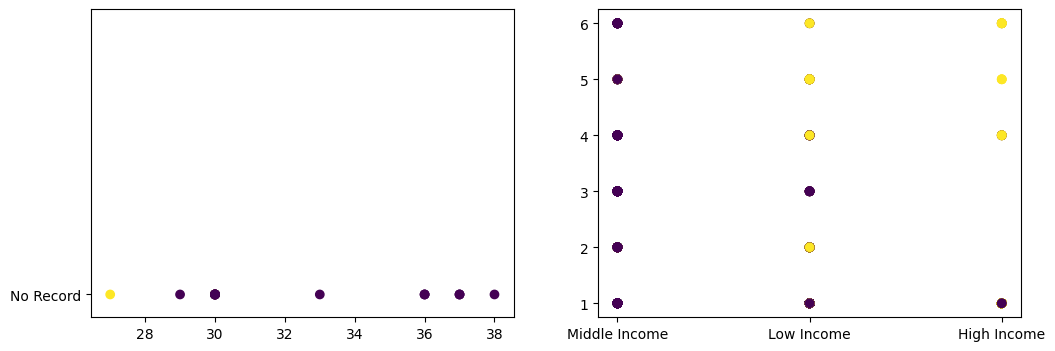

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["Age"], samples["FrequentFlyer"], c=samples["Target"])
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["AnnualIncomeClass"], samples["ServicesOpted"], c=samples["Target"].astype("int"))
